In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


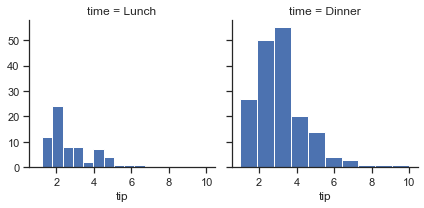

In [5]:
g = sns.FacetGrid(tips,col="time") # 出坐标轴
g.map(plt.hist, "tip") # 绘图

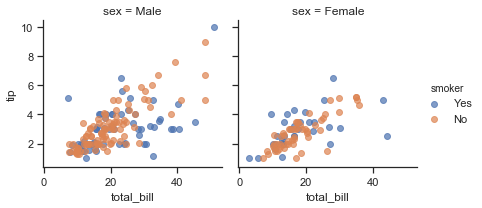

In [7]:
g = sns.FacetGrid(tips,col="sex",hue = "smoker")
g.map(plt.scatter,"total_bill","tip",alpha=0.7)
g.add_legend()

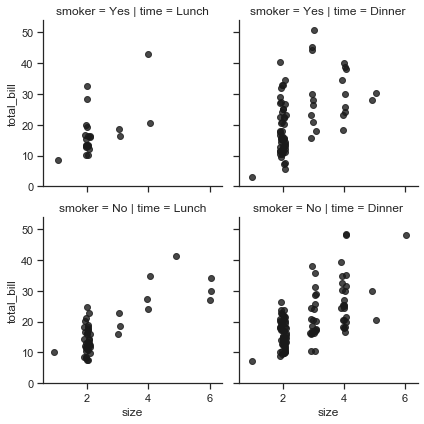

In [17]:
g = sns.FacetGrid(tips, row="smoker", col="time")
g.map(sns.regplot, "size", "total_bill", 
      color="0.1", # 越大越浅 
      fit_reg=False, # 趋势线
      x_jitter=0.1); # 聚合度

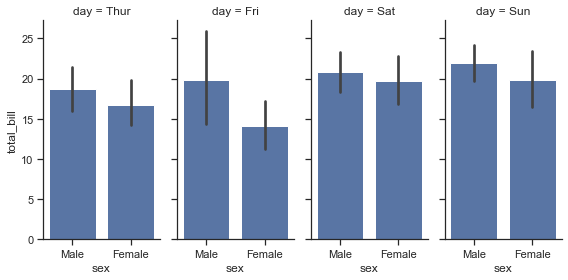

In [22]:
g = sns.FacetGrid(tips, col="day", 
                  height=4, # 图大小 
                  aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

In [23]:
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")


d:\python\virtualenvs\jupy36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


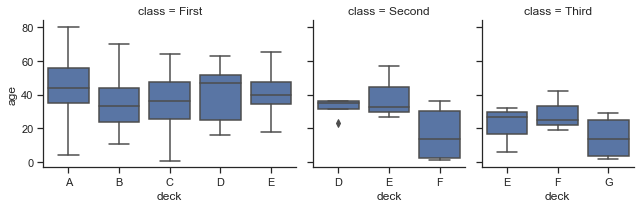

In [28]:
g = sns.FacetGrid(titanic, col="class", 
                  sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

d:\python\virtualenvs\jupy36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


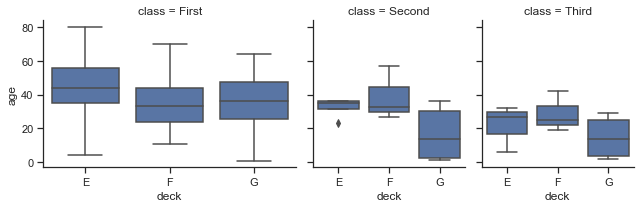

In [29]:
g = sns.FacetGrid(titanic, col="class", 
                  sharex=True,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

In [32]:
ordered_days = tips.day.value_counts().index
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

d:\python\virtualenvs\jupy36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


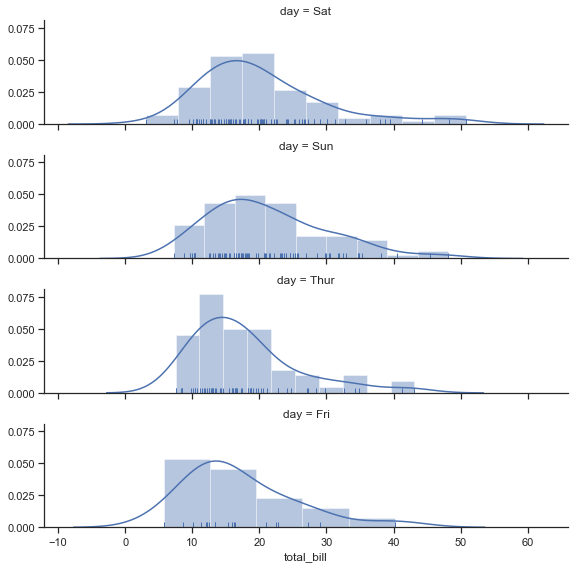

In [45]:
g = sns.FacetGrid(tips, row="day",  # 以day为行
                  row_order=ordered_days, # 行排序原则
                  size=2.0, # 图大小
                  aspect=4,) # 图延伸
g.map(sns.distplot, "total_bill", hist=True, rug=True);

In [46]:
pal = dict(Lunch="seagreen", Dinner="gray")


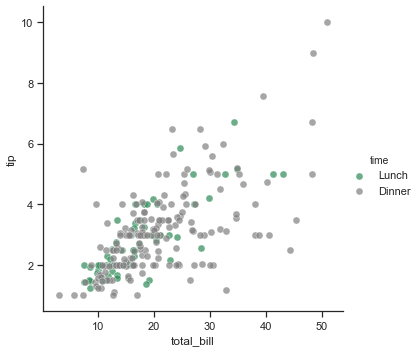

In [47]:
g = sns.FacetGrid(tips, hue="time", 
                  palette=pal, # 字典形式指定颜色 
                  size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

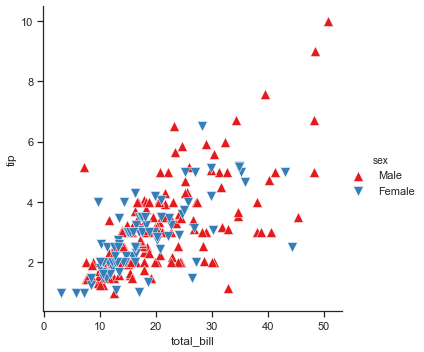

In [51]:
g = sns.FacetGrid(tips, hue="sex", 
                  palette="Set1", 
                  size=5, 
                  hue_kws={"marker": ["^", "v"]}) 
g.map(plt.scatter, 
      "total_bill",  # x轴
      "tip",  # y轴
      s=100, # 图标大小 
      linewidth=.5,  # 线宽
      edgecolor="white")
g.add_legend();

In [52]:
attend = sns.load_dataset("attention").query("subject <= 12")


d:\python\virtualenvs\jupy36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


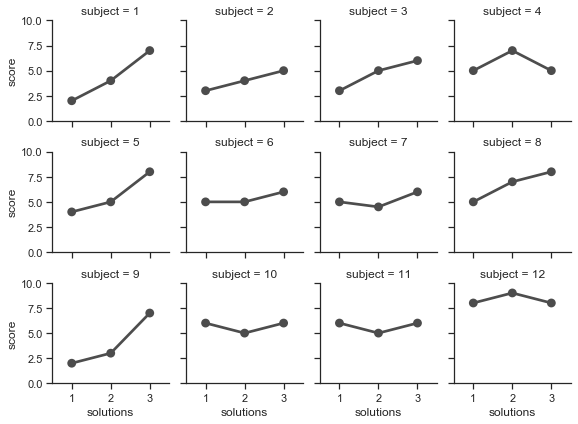

In [54]:
g = sns.FacetGrid(attend, 
                  col="subject", 
                  col_wrap=4, 
                  size=2, 
                  ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
    
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);